In [1]:
from __future__ import division

from itertools import permutations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.exception import NetworkXNoPath
import Selection_Algorithm

In [2]:
#G = nx.karate_club_graph()
fh=open("DataSet/email.txt", 'rb')
G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
fh.close()

G = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

In [3]:
__all__ = ['efficiency', 'local_efficiency', 'global_efficiency']

def efficiency(G, u, v):
    try:
        eff = 1 / nx.shortest_path_length(G, u, v)
    except NetworkXNoPath:
        eff = 0
    return eff

def global_efficiency(G):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        g_eff = sum(efficiency(G, u, v) for u, v in permutations(G, 2)) / denom
    else:
        g_eff = 0
    # TODO This can be made more efficient by computing all pairs shortest
    # path lengths in parallel.
    #
    # TODO This summation can be trivially parallelized.
    return g_eff
def local_efficiency(G):
    # TODO This summation can be trivially parallelized.
    efficiency_list = (global_efficiency(G.subgraph(G[v])) for v in G)
    return sum(efficiency_list) / len(G)

In [4]:
def number_of_nodes(G):
    """Return the number of nodes in the graph."""
    return G.number_of_nodes()


def number_of_edges(G):
    """Return the number of edges in the graph. """
    return G.number_of_edges()
def density1(G):
    n=number_of_nodes(G)
    m=number_of_edges(G)
    if m==0 or n <= 1:
        d=0.0
    else:
        if G.is_directed():
            d=m/float(n*(n-1))
        else:
            d= m*2.0/float(n*(n-1))
    return d


In [5]:
def eff():
    i=0
    eff_list=[]
    nodes =  G.nodes
    if nodes!= 0:
        
        #H = nx.karate_club_graph()
        for i in G:  
            H = G.copy()
            ebunch =list(Selection_Algorithm.subgraph_of(i).edges)
            #H.remove_edges_from(ebunch)
            H.remove_node(i)
            efficiency = global_efficiency(H)
            density = density1(H)
            EF = (i, efficiency, density)       
            eff_list.append(EF)
            
    return  eff_list

In [6]:
eff_table = pd.DataFrame(eff(), columns = ('nodes','Efficiency','Density'))
eff_table.index = eff_table.index + 1
eff_table.nodes = eff_table.nodes + 1
print(eff_table)

      nodes  Efficiency   Density
1         1    0.299599  0.008470
2         2    0.298409  0.008481
3         3    0.299525  0.008457
4         4    0.299711  0.008482
5         5    0.299802  0.008501
6         6    0.299724  0.008484
7         7    0.299422  0.008476
8         8    0.299858  0.008504
9         9    0.299733  0.008490
10       10    0.299119  0.008467
11       11    0.299695  0.008486
12       12    0.299772  0.008489
13       13    0.299299  0.008478
14       14    0.299038  0.008461
15       15    0.299689  0.008487
16       16    0.299298  0.008437
17       17    0.299880  0.008506
18       18    0.299731  0.008489
19       19    0.299635  0.008473
20       20    0.299744  0.008490
21       21    0.298359  0.008450
22       22    0.299826  0.008493
23       23    0.298740  0.008437
24       24    0.298884  0.008451
25       25    0.299560  0.008486
26       26    0.299912  0.008512
27       27    0.299714  0.008484
28       28    0.299787  0.008498
29       29   

In [10]:
#eff_table.to_csv('result/EFF1_email.csv')

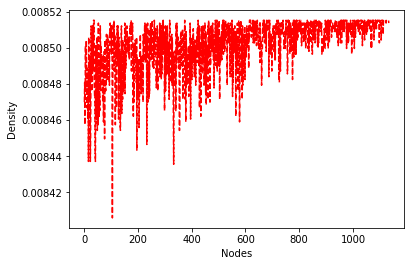

In [11]:
#plt.plot(eff_table.Efficiency, 'r-o')
plt.plot(eff_table.Density, 'r--')
#plt.legend(["Efficiency"])
plt.xlabel("Nodes")
plt.ylabel("Density")
#plt.savefig("result/email_eff1.png")
plt.show()

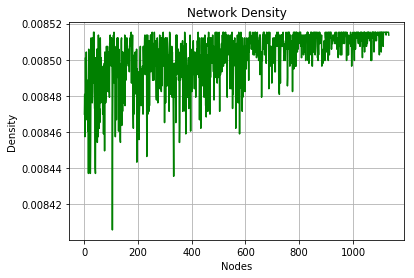

In [12]:
# Create two subplots sharing y axis
fig, (ax1) = plt.subplots(1, sharex=True)

ax1.set(title='Network Density', ylabel='Efficiency')
ax1.grid()

ax1.plot(eff_table.nodes, eff_table.Density, 'g')
ax1.set(xlabel='Nodes', ylabel='Density')
#plt.savefig("result/email_eff2.png")
plt.show()